# EthioMart NER Project - Exploratory Data Analysis
## Overview
This notebook analyzes processed Telegram data to validate ingestion and preprocessing steps.

c:\Users\Cyber Defense\Desktop\week2\fintech-reviews-analytics\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sample Data:
     channel                                               text  \
0  @AwasMart                                                NaN   
1  @AwasMart                                                NaN   
2  @AwasMart                                                NaN   
3  @AwasMart                                                NaN   
4  @AwasMart  ❇️Baby bank feeding bottle\n\n       ዋጋ💵፦  💰 2...   
5  @AwasMart                                🌵Dancing Cactus Toy   
6  @AwasMart                                🌵Dancing Cactus Toy   
7  @AwasMart  🌵Dancing Cactus Toy \n\n😱ልጆቼ በምን ይዝናኑ ብሎ መጨነቅ ...   
8  @AwasMart         🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽🍽\n❇️12pcs Silicone Kitchen Set   
9  @AwasMart                                                NaN   

                                      processed_text  views  
0                                                NaN    954  
1                                                NaN    954  
2                                                NaN    967  
3

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_19860\3697593741.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index.str.replace('@', ''), y=channel_counts.values, palette='muted')


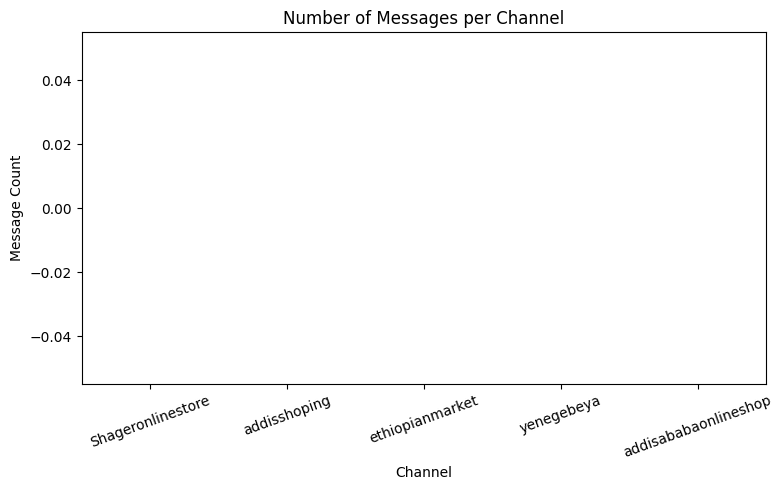

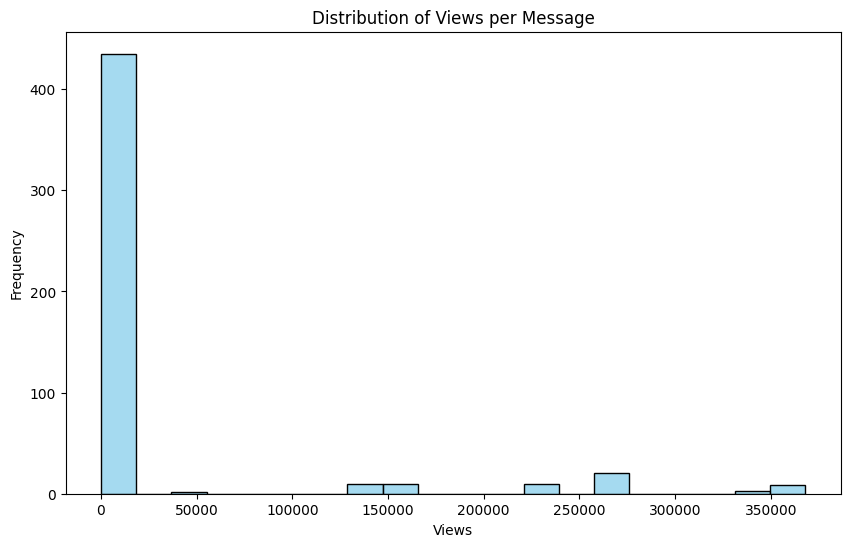

2025-06-21 05:45:02,402 - INFO - Empty or non-string text input received


Raw Text: nan
Processed Text: 

Summary Statistics:
Total Messages: 499
Messages with Media: 494
Average Views per Message: 31118.45


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to path
sys.path.append('../')
from src.preprocessing.preprocess import preprocess_amharic_text

# Load processed data
data_dir = '../data/processed/'
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
if not csv_files:
    print('No CSV files found in data/processed/. Run process_data.py first.')
else:
    df = pd.concat([pd.read_csv(f'{data_dir}{f}', encoding='utf-8') for f in csv_files])
    
    # Display sample data
    print('Sample Data:')
    print(df[['channel', 'text', 'processed_text', 'views']].head(10))
    
    # Message count per channel
    channel_counts = df['channel'].value_counts().reindex([
        '@Shageronlinestore', '@addisshoping', '@ethiopianmarket',
        '@yenegebeya', '@addisababaonlineshop'
    ], fill_value=0)
    # Plot message count per channel
    plt.figure(figsize=(8, 5))
    sns.barplot(x=channel_counts.index.str.replace('@', ''), y=channel_counts.values, palette='muted')
    plt.title('Number of Messages per Channel')
    plt.xlabel('Channel')
    plt.ylabel('Message Count')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
    
    # Views distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['views'].fillna(0), bins=20, color='skyblue')
    plt.title('Distribution of Views per Message')
    plt.xlabel('Views')
    plt.ylabel('Frequency')
    plt.show()
    
    # Preprocessing validation
    sample_text = df['text'].iloc[0] if not df.empty else 'ዋጋ 1000 ብር አዲስ አበባ'
    print(f'Raw Text: {sample_text}')
    print(f'Processed Text: {preprocess_amharic_text(sample_text)}')
    
    # Summary statistics
    print('\nSummary Statistics:')
    print(f'Total Messages: {len(df)}')
    print(f"Messages with Media: {df[['image_path', 'doc_path']].notnull().any(axis=1).sum()}")
    print(f"Average Views per Message: {df['views'].mean():.2f}")